In [4]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('archive/Age_Group_Gender_Distribution.csv')

# Access data in the DataFrame using column names or indexing
print(df)
print(df.iloc[0])  # Access first row

    Unnamed: 0   Age Group         Male       Female        Total  Sex ratio  \
0          NaN       Total  123,824,681  116,613,077  240,458,089     106.12   
1          0.0       0 – 4     18744989     17726432     36471421      105.1   
2          1.0       5 – 9     16566852     15705284     32272136      108.8   
3          2.0     10 – 14     14971914     13817137     28790182      111.8   
4          3.0     15 – 19     12581753     11569893     24154118      108.0   
5          4.0     20 – 24     10323755     10141864     20468713      100.0   
6          5.0     25 – 29      8946770      9016962     17967161       98.8   
7          6.0     30 – 34      7730953      8026004     15759670       96.4   
8          7.0     35 – 39      7313967      7047727     14364278      102.2   
9          8.0     40 – 44      6471820      6063242     12536758      101.5   
10         9.0     45 – 49      5095175      4624839      9721110      104.9   
11        10.0     50 – 54      4219234 

In [3]:
import pandas as pd

# Read the CSV file into a DataFrame
df1 = pd.read_csv('archive/City_Population_Growth_Trends.csv')

# Access data in the DataFrame using column names or indexing
print(df1)
print(df1.iloc[0])  # Access first row

    Unnamed: 0       City Name Province or Territory  2023 Population[15]  \
0            0         Karachi                 Sindh             18868021   
1            1          Lahore                Punjab             13004135   
2            2      Faisalabad                Punjab              3691999   
3            3      Rawalpindi                Punjab              3357612   
4            4      Gujranwala                Punjab              2668047   
5            5          Multan                Punjab              2215381   
6            6       Hyderabad                 Sindh              1921275   
7            7        Peshawar                   KPK              1905975   
8            8          Quetta           Balochistan              1565546   
9            9       Islamabad                   ICT              1108872   
10          10        Sargodha                Punjab               975886   
11          11         Sialkot                Punjab               911817   

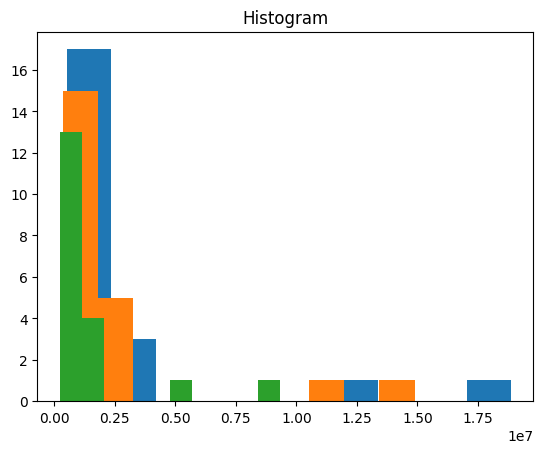

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# reading the database
data = pd.read_csv("archive/City_Population_Growth_Trends.csv")

# histogram of total_bills
plt.hist(data['2023 Population[15]'])
plt.hist(data['2017 Population[16]'])
plt.hist(data['1998 Population[11]'])

plt.title("Histogram")

# Adding the legends
plt.show()

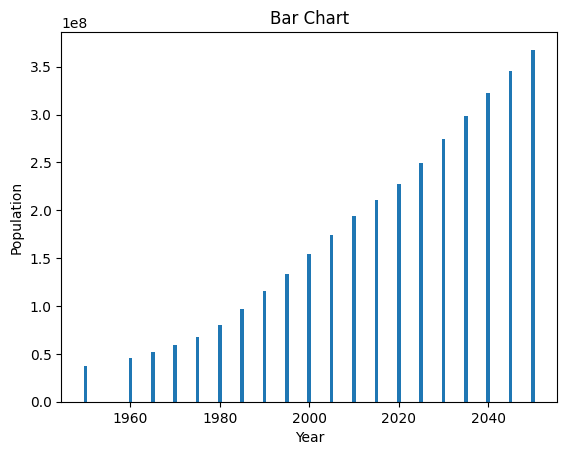

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


# reading the database
data = pd.read_csv("archive/Population_Age_Distribution.csv")

# Bar chart with day against tip
plt.bar(data['Year'], data['Population'])

plt.title("Bar Chart")

# Setting the X and Y labels
plt.xlabel('Year')
plt.ylabel('Population')

# Adding the legends
plt.show()

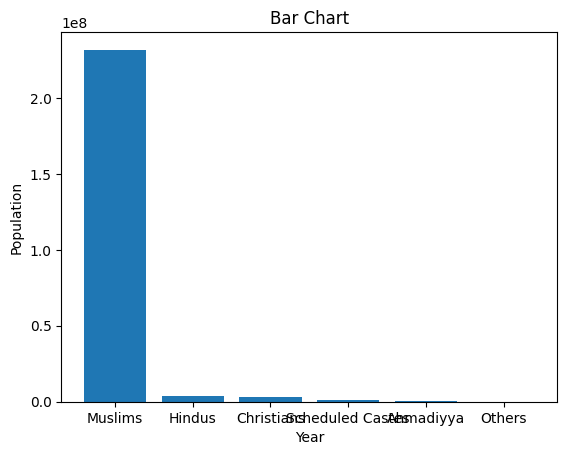

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


# reading the database
data2 = pd.read_csv("archive/Religion_Population_Distribution.csv")

# Bar chart with day against tip
plt.bar(data['Religion'], data['Population'])

plt.title("Bar Chart")

# Setting the X and Y labels
plt.xlabel('Year')
plt.ylabel('Population')

# Adding the legends
plt.show()